# Data Handling in Neural Networks

## Table of Contents
1. Data Preprocessing
2. Data Augmentation
3. Regularization
4. Weights Initialization

## Data Preprocessing
Data Preprocessing is the same process that's done in Statistical Machine Learning. In the preprocessing stage, we'll prepare the data to be fed to the Neural Net model. The first step is clearing the dataset of null values. Then, we'll convert categorical variables to numerical variables. Like any ML Models Neural Nets work with numerical data, not categorical. 

We'll also split the data into features & targets first, then a training and testing set. Finally, we'll scale the data/standardize it so that it ranges from -1 to 1. This standardization helps both train the model better and allows it to converge easier.

Data preprocessing is a crucial step in a Machine Learning pipeline. Without dropping certain variables, dealing with missing values, encoding categorical values and standardization - we'd be feeding a messy (or impossible) dataset into a model.

The model will only be as good as the data we feed it and in this article - we've prepped a dataset to fit a model.

**References**
- [Keras Utils for Image, Timeseries & Text Data Preprocessing](https://keras.io/api/preprocessing/)
- Keras Preprocessing Layers for Standardization & Encoding
    - tensorflow.keras.layers.Normalization
    - tensorflow.keras.layers.CategoryEncoding
    - tensorflow.keras.layers.StringLookup
    - tensorflow.keras.layers.IntegerLookup
- Keras Utilities for Data Preprocessing
    - tensorflow.keras.utils.to_categorical

## Examples

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [48]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**Normalization Layer**
This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling (input - mean) / sqrt(var) at runtime.

The mean and variance values for the layer must be either supplied on construction or learned via adapt(). adapt() will compute the mean and variance of the data and store them as the layer's weights

In [50]:
adapt_data = np.array([1., 2., 3., 4., 5.], dtype='float32')
input_data = np.array([1., 2., 3.], dtype='float32')


In [7]:
adapt_data

array([1., 2., 3., 4., 5.], dtype=float32)

In [51]:
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(adapt_data)


In [55]:
adapt_data.mean()
adapt_data.std()

1.4142135

In [56]:
-2/1.414

-1.4144271570014144

In [52]:
layer(input_data)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4142135 , -0.70710677,  0.        ], dtype=float32)>

Steps:

1. DataSet
2. EDA
3. Data Preprocessing
4. Train & Test
5. Model (Training, Testing, Validation)
6. You need to put the Model in production (Save the model & Load it in your application)

Production:
1. Model is a component within an application
2. Preprocess data before you send it to Model (Data need to be transformed prior to sending it to the model)

![Data Preprocessing](datapreprocessing.png)

## Data Augmentation

One common problem we always encounter is insufficient data. So how do I get more data, if I don’t have “more data”?

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.[1] It is closely related to oversampling in data analysis.

This is very popular w.r.t image processing, for e.g. Geometric transformations, flipping, color modification, cropping, rotation, noise injection and random erasing are used to augment image in deep learning. 

**Common Techniques**
- Horizontal flips
- Rotation
- Crop/scale
- Color jitter
- Other creative techniques
    - Random mix/combinations of :
    - translation (what about a pure ConvNet?)
    - Rotation
    - Stretching
    - Shearing
    - lens distortions, …  (go crazy)

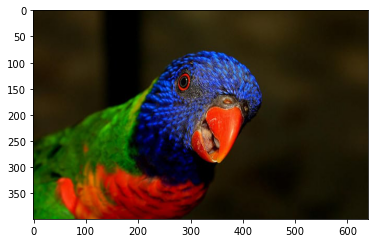

In [57]:
from matplotlib import pyplot
# load the image
img = tf.keras.preprocessing.image.load_img('bird.jpg')
pyplot.imshow(img)
pyplot.show()


[[[36. 28.  9.]
  [36. 28.  9.]
  [36. 28.  9.]
  ...
  [34. 23.  3.]
  [34. 23.  3.]
  [34. 23.  3.]]

 [[36. 28.  9.]
  [36. 28.  9.]
  [36. 28.  9.]
  ...
  [34. 23.  3.]
  [34. 23.  3.]
  [34. 23.  3.]]

 [[35. 27.  8.]
  [35. 27.  8.]
  [35. 27.  8.]
  ...
  [35. 24.  4.]
  [35. 24.  4.]
  [35. 24.  4.]]

 ...

 [[24. 90.  3.]
  [24. 93.  4.]
  [26. 97.  5.]
  ...
  [24. 21.  4.]
  [24. 21.  4.]
  [24. 21.  4.]]

 [[25. 89.  2.]
  [28. 92.  5.]
  [28. 97.  4.]
  ...
  [24. 21.  4.]
  [24. 21.  4.]
  [24. 21.  4.]]

 [[26. 88.  2.]
  [29. 91.  5.]
  [30. 97.  4.]
  ...
  [24. 21.  4.]
  [24. 21.  4.]
  [24. 21.  4.]]]


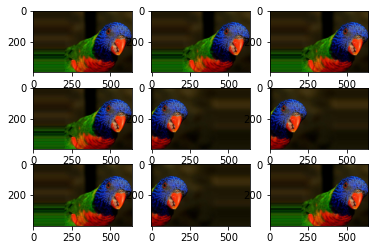

In [58]:
# example of horizontal shift image augmentation

# convert to numpy array
data = tf.keras.preprocessing.image.img_to_array(img)
print(data)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

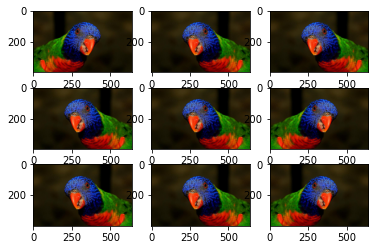

In [59]:
# Horizontal Flip

# convert to numpy array
data = tf.keras.preprocessing.image.img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

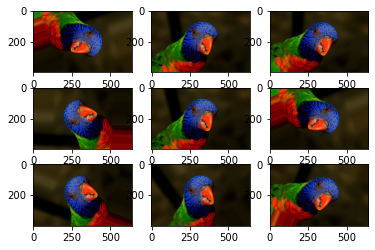

In [60]:
# Random Rotation

# convert to numpy array
data = tf.keras.preprocessing.image.img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

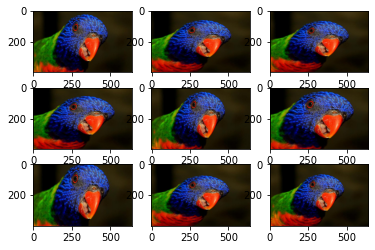

In [61]:
# Random Zoom Augmentation
# convert to numpy array
data = tf.keras.preprocessing.image.img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


## Weights Initialization

Weight initialization is an important design choice when developing deep learning neural network models.

Historically, weight initialization involved using small random numbers, although over the last decade, more specific heuristics have been developed that use information, such as the type of activation function that is being used and the number of inputs to the node.

The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. If either occurs, loss gradients will either be too large or too small to flow backwards beneficially, and the network will take longer to converge, if it is even able to do so at all.

Each time, a neural network is initialized with a different set of weights, resulting in a different starting point for the optimization process, and potentially resulting in a different final set of weights with different performance characteristics.

### What happens when W=0 init is used?
We cannot initialize all weights to the value 0.0 as the optimization algorithm results in some asymmetry in the error gradient to begin searching effectively
Read [https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)

### Techniques
The modern weight initialization techniques are divided based on the type of activation function used in the nodes that are being initialized, such as “Sigmoid and Tanh” and “ReLU.”

- Random initialization
- Xavier or Glorot initialization ==> Used with Sigmoid or TanH functions. The xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(1/sqrt(n)) and 1/sqrt(n), where n is the number of inputs to the node. weight = U [-(1/sqrt(n)), 1/sqrt(n)]
- He initialization ==> Used with ReLu. The he initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node. weight = G (0.0, sqrt(2/n))
- Kaiming initialization ==> Used with ReLu. They proposed a small modification of Xavier initialization to make it suitable for use with ReLU, now commonly referred to as “Kaiming initialization” (specifically +/- sqrt(2/n) where n is the number of nodes in the prior layer known as the fan-in).

And many more

The following built-in initializers are available as part of the tensorflow.keras.initializers module:
- Constant
- GlorotNormal
- GlorotUniform
- HeNormal
- HeUniform
- Idenity
- LecunNormal
- LecunUniform
- Ones
- Orthogonal
- RandomNormal
- RandomUniform
- TruncatedNormal
- VarianceScaling
- Zeros


In [62]:
# example of the xavier weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print(lower, upper)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

-0.31622776601683794 0.31622776601683794
-0.3154550593017272 0.31586167559245654
-0.0014142630668019939 0.17967228242724678


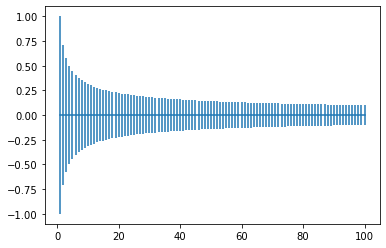

In [63]:
# plot of the bounds on xavier weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot
# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]
# calculate the range for each number of inputs
results = [1.0 / sqrt(n) for n in values]
# create an error bar plot centered on 0 for each number of inputs
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

In [64]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
values = initializer(shape=(2, 2))
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.6201241 ,  0.9800566 ],
       [-1.1520488 , -0.12097065]], dtype=float32)>

In [65]:
initializer = tf.keras.initializers.RandomUniform(minval=-1, maxval=1)
values = initializer(shape=(2, 2))
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.6706846 ,  0.48213482],
       [-0.80282736,  0.51729393]], dtype=float32)>

In [66]:
initializer = tf.keras.initializers.zeros()
values = initializer(shape=(2, 2))
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [71]:
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2, 2))
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.52401984,  0.11101152],
       [ 1.3468364 ,  0.47947893]], dtype=float32)>

In [75]:
initializer = tf.keras.initializers.GlorotUniform()
values = initializer(shape=(2,2))
values

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.65330184, 0.6952046 ],
       [1.0118715 , 0.94761264]], dtype=float32)>

Search problems are often very challenging and require the use of nondeterministic algorithms that make heavy use of randomness.
The algorithms are not random per se; instead they make careful use of randomness. They are random within a bound and are referred to as stochastic algorithms. The incremental, or step-wise, nature of the search often means the process and the algorithms are referred to as an optimization from an initial state or position to a final state or position. For example, stochastic optimization problem or a stochastic optimization algorithm.

The search process is incremental from a starting point in the space of possible solutions toward some good enough solution.

They share common features in their use of randomness, such as:

Use of randomness during initialization.
Use of randomness during the progression of the search.

We know nothing about the structure of the search space. Therefore, to remove bias from the search process, we start from a randomly chosen position.

As the search process unfolds, there is a risk that we are stuck in an unfavorable area of the search space. Using randomness during the search process gives some likelihood of getting unstuck and finding a better final candidate solution.

The idea of getting stuck and returning a less-good solution is referred to as getting stuck in a local optima.

## Regularization
One of the most common problems data science professionals face is to avoid overfitting. Regularization helps in overcoming overfitting problem. Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better.

Regularization, in machine learning, penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.

![Over Fitting](overfit.png)

Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero. This will result in a much simpler linear network and slight underfitting of the training data.

![Under Fitting](underfit.png)

Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below

![Appropriate Fitting](rightfit.png)

### Techniques
- L2 & L1 Regularization ==> L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term
- BatchNormalization
- Dropout ==> This is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning. So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.

![Dropout](dropout.gif)


Row1, Row2, ..., Rown (F1, F2, .., Fn)

Y = F(Fx)
Y = F1(Fx) + F2(Fx)+ ... + Fn(Fx)
  = FF(F1(Fx), F2(Fx)) + FF(F3(Fx)+F4(Fx))

In [76]:
# load the dataset
import pandas as pd
dataset = pd.read_csv('pima-indians-diabetes.csv', delimiter=',', header=None)

In [77]:
# split into input (X) and output (y) variables
X = dataset.loc[:,:7]
y = dataset.loc[:,8]

In [78]:
# Splitting the dataset into the Training and Testing set

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [79]:
model = tf.keras.models.Sequential()

In [80]:
# Add Network Layers
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [81]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
# fit the keras model on the dataset (Train the data)
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 1.5531 - accuracy: 0.4886
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 1.0855 - accuracy: 0.5114
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.5228
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8508 - accuracy: 0.5407
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.5537
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.5554
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7506 - accuracy: 0.5717
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.5945
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.6156
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.6091
Epoch 11/

In [83]:
model = tf.keras.models.Sequential()
# Add Network Layers
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# fit the keras model on the dataset (Train the data)
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 4ms/step - loss: 0.7295 - accuracy: 0.4707
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6384
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6857
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6792
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.7003
Epoch 6/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.7068
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7101
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7166
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7215
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7166
Epoch 11/

In [85]:
model = tf.keras.models.Sequential()
# Add Network Layers
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
# fit the keras model on the dataset (Train the data)
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 0.7036 - accuracy: 0.4723
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.6091
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6336
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6368
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6352
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6270
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6417
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6384
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6303
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.6384
Epoch 11/